# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import urllib3
from bs4 import BeautifulSoup
import re
import warnings
import statsmodels.formula.api as smf
import time

In [ ]:
# For mathematical computation

import numpy as np
import pandas as pd
import scipy.stats as stats

# For data visualization

import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from matplotlib.pyplot import figure

%matplotlib inline

In [ ]:
df = pd.read_csv("IPO.csv", encoding="latin-1")
df.head()

,Date,IPO_Name,Issue_Size(crores),QIB,HNI,RII,Issue_price,Listing_Open,Listing_Close,Listing_Gains(%),CMP,Current_gains
0,26-11-21,Tarsons Product,1030.22,1.06,3.40,2.49,662.0,700.0,840.00,26.89,641.45,-3.10
1,23-11-21,Latent View,622.11,145.48,850.66,119.44,197.0,530.0,488.60,148.02,639.85,224.80
2,18-11-21,Sapphire Foods,2073.00,3.11,2.34,5.25,1180.0,1311.0,1216.05,3.06,"1,048.05",-11.18
3,18-11-21,One 97(Paytm),18915.90,2.79,0.24,1.66,2150.0,1955.0,1564.15,-27.25,"1,655.00",-23.02
4,15-11-21,SJS Enterprises,816.57,1.42,2.32,1.38,542.0,514.0,509.85,-5.93,441.05,-18.63


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                288 non-null    object 
 1   IPO_Name            288 non-null    object 
 2   Issue_Size(crores)  288 non-null    float64
 3   QIB                 288 non-null    float64
 4   HNI                 288 non-null    float64
 5   RII                 288 non-null    float64
 6   Issue_price         288 non-null    float64
 7   Listing_Open        288 non-null    float64
 8   Listing_Close       288 non-null    float64
 9   Listing_Gains(%)    288 non-null    float64
 10  CMP                 288 non-null    object 
 11  Current_gains       286 non-null    float64
dtypes: float64(9), object(3)
memory usage: 27.1+ KB


In [ ]:
# Describe the data

df.describe()

,Issue_Size(crores),QIB,HNI,RII,Issue_price,Listing_Open,Listing_Close,Listing_Gains(%),Current_gains
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,286.000000
mean,1118.383750,24.834687,71.413646,8.341181,368.913194,438.374653,396.502917,5.993056,65.616573
std,2160.932743,37.837647,142.500596,14.159700,361.287606,458.703932,439.609061,49.354577,261.408128
min,0.000000,0.000000,0.000000,0.000000,0.000000,9.500000,1.570000,-97.150000,-99.930000
25%,156.142500,1.147500,1.210000,1.367500,113.750000,125.200000,104.112500,-11.340000,-73.785000
50%,474.000000,4.810000,5.075000,3.405000,242.500000,272.200000,234.555000,2.315000,-1.800000
75%,1049.480000,35.492500,73.295000,8.535000,522.500000,600.000000,584.975000,25.780000,114.397500
max,18915.900000,176.850000,958.070000,119.440000,2150.000000,2725.000000,3118.650000,270.400000,2478.690000


<ipython-input-6-7288ced7b857>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax)


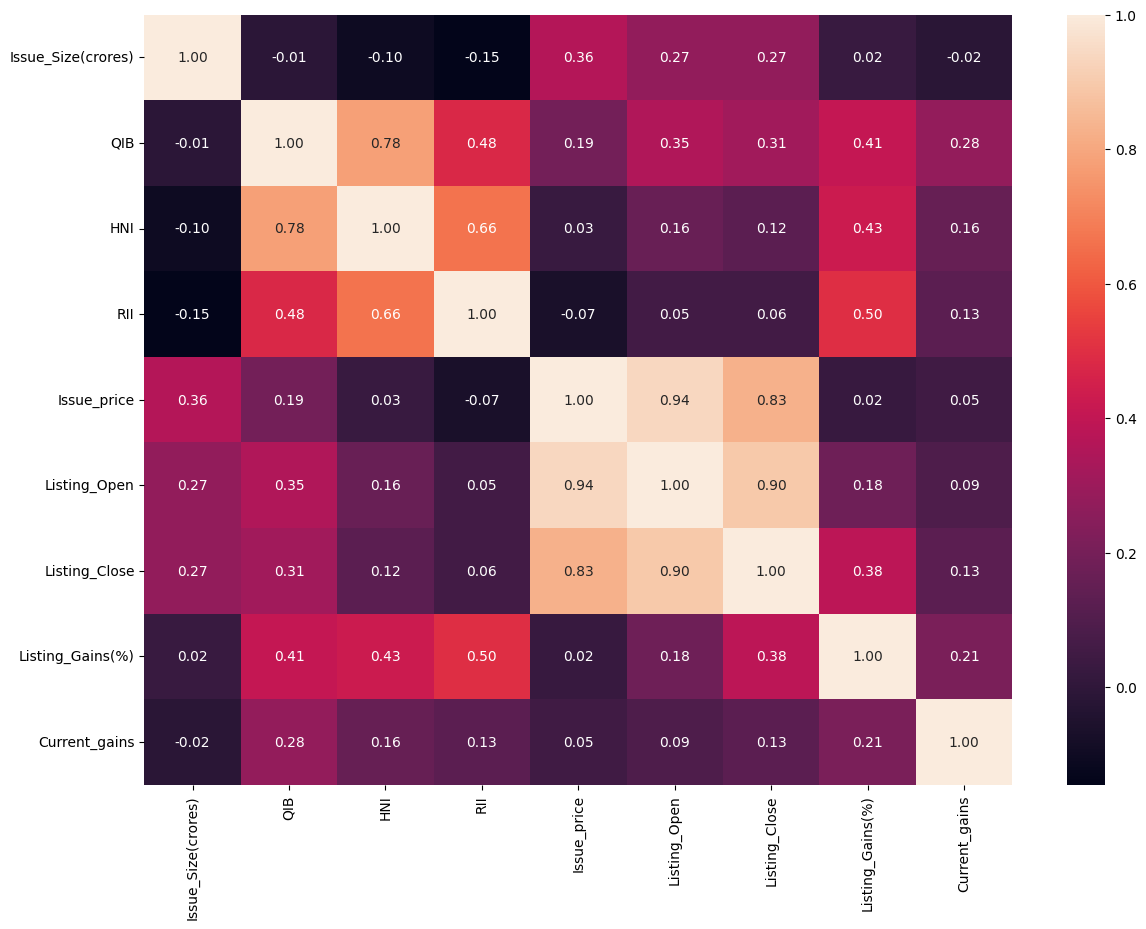

In [ ]:
# Heatmap

f, ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax)
plt.show()

In [ ]:
# Cleaning & Modification of Data

date = df.Date.str.split('-', expand=True)
df['year'] = date[2]
df['month'] = date[1]
df['day'] = date[0]

df.year = pd.to_numeric(df.year)
df.month = pd.to_numeric(df.month)
df.day = pd.to_numeric(df.day)

In [ ]:
df.head()

,Date,IPO_Name,Issue_Size(crores),QIB,HNI,RII,Issue_price,Listing_Open,Listing_Close,Listing_Gains(%),CMP,Current_gains,year,month,day
0,26-11-21,Tarsons Product,1030.22,1.06,3.40,2.49,662.0,700.0,840.00,26.89,641.45,-3.10,21,11,26
1,23-11-21,Latent View,622.11,145.48,850.66,119.44,197.0,530.0,488.60,148.02,639.85,224.80,21,11,23
2,18-11-21,Sapphire Foods,2073.00,3.11,2.34,5.25,1180.0,1311.0,1216.05,3.06,"1,048.05",-11.18,21,11,18
3,18-11-21,One 97(Paytm),18915.90,2.79,0.24,1.66,2150.0,1955.0,1564.15,-27.25,"1,655.00",-23.02,21,11,18
4,15-11-21,SJS Enterprises,816.57,1.42,2.32,1.38,542.0,514.0,509.85,-5.93,441.05,-18.63,21,11,15


In [ ]:
# Pie Chart of year-wise IPO launches in India

fig1 = px.pie(df, names="year")
fig1.show()

In [ ]:
# Pie Chart of Month Wise IPO Launches in India

fig2 = px.pie(df, names="month")
fig2.show()

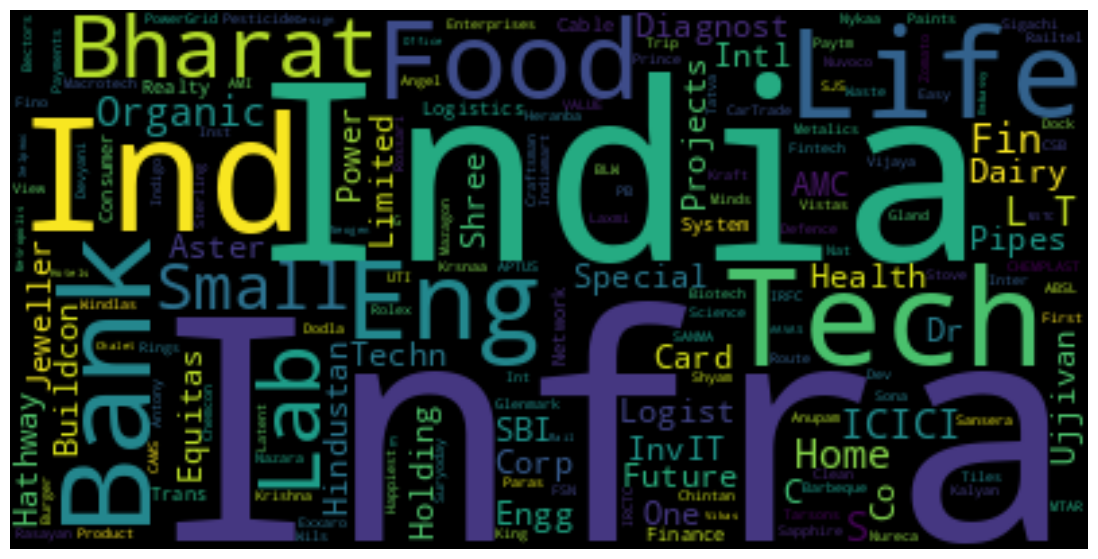

In [ ]:
# WordCloud

from wordcloud import WordCloud

wordCloud = WordCloud().generate(' '.join(df.IPO_Name))

plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordCloud, interpolation="bilinear")
plt.show()


In [ ]:
# Grouping IPOs by Top listing gain percentages

top_gainer = df.groupby("IPO_Name").sum().sort_values("Listing_Gains(%)", ascending=False).head(20)
top_gainer = top_gainer.reset_index()
px.bar(x="IPO_Name", y="Listing_Gains(%)", data_frame=top_gainer)

<ipython-input-12-b494cfb16d4e>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
x = df[df['IPO_Name'] == "Sigachi Ind"]
x

,Date,IPO_Name,Issue_Size(crores),QIB,HNI,RII,Issue_price,Listing_Open,Listing_Close,Listing_Gains(%),CMP,Current_gains,year,month,day
6,15-11-21,Sigachi Ind,0.0,42.15,78.82,41.26,163.0,575.0,603.75,270.4,429.35,163.4,21,11,15


In [ ]:
# Top losers in the opening market listing

top_loser = df.groupby("IPO_Name").sum().sort_values("Listing_Gains(%)", ascending=True).head(20)
top_loser = top_loser.reset_index()
px.bar(x="IPO_Name", y="Listing_Gains(%)", data_frame=top_loser)

<ipython-input-14-a7b267a50e13>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
x2 = df[df["IPO_Name"] == "VKS Projects"]
x2

,Date,IPO_Name,Issue_Size(crores),QIB,HNI,RII,Issue_price,Listing_Open,Listing_Close,Listing_Gains(%),CMP,Current_gains,year,month,day
186,18-07-12,VKS Projects,55.0,1.15,0.38,1.13,55.0,55.8,1.57,-97.15,0.04,-99.93,12,7,18


In [ ]:
# Top 20 Current Top Gainers

current_top_gainers = df.groupby("IPO_Name").sum().sort_values("Current_gains", ascending=False).head(20)
current_top_gainers = current_top_gainers.reset_index()
px.bar(x="IPO_Name", y="Current_gains", data_frame=current_top_gainers)

<ipython-input-16-c75da924b7d3>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
x3 = df[df["IPO_Name"] == "Jubilant Food"]
x3

,Date,IPO_Name,Issue_Size(crores),QIB,HNI,RII,Issue_price,Listing_Open,Listing_Close,Listing_Gains(%),CMP,Current_gains,year,month,day
286,08-02-10,Jubilant Food,328.7,59.39,51.95,3.79,145.0,160.0,114.5,-21.03,"3,739.10",2478.69,10,2,8


In [ ]:
# Grouping Top IPOs based on issue size

issue_size = df.groupby("IPO_Name").sum().sort_values("Issue_Size(crores)", ascending=False).head(20)
issue_size = issue_size.reset_index()
px.bar(x="IPO_Name", y="Issue_Size(crores)", data_frame=issue_size)

<ipython-input-18-e6a09e4a968e>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
# IPOs launched in the year 2021

x4 = df[df["year"] == 21]
x4


,Date,IPO_Name,Issue_Size(crores),QIB,HNI,RII,Issue_price,Listing_Open,Listing_Close,Listing_Gains(%),CMP,Current_gains,year,month,day
0,26-11-21,Tarsons Product,1030.22,1.06,3.40,2.49,662.0,700.00,840.00,26.89,641.45,-3.10,21,11,26
1,23-11-21,Latent View,622.11,145.48,850.66,119.44,197.0,530.00,488.60,148.02,639.85,224.80,21,11,23
2,18-11-21,Sapphire Foods,2073.00,3.11,2.34,5.25,1180.0,1311.00,1216.05,3.06,"1,048.05",-11.18,21,11,18
3,18-11-21,One 97(Paytm),18915.90,2.79,0.24,1.66,2150.0,1955.00,1564.15,-27.25,"1,655.00",-23.02,21,11,18
4,15-11-21,SJS Enterprises,816.57,1.42,2.32,1.38,542.0,514.00,509.85,-5.93,441.05,-18.63,21,11,15
5,15-11-21,PB Fintech,6273.50,9.83,2.58,1.67,980.0,1444.00,1202.90,22.74,"1,210.50",23.52,21,11,15
6,15-11-21,Sigachi Ind,0.00,42.15,78.82,41.26,163.0,575.00,603.75,270.40,429.35,163.40,21,11,15
7,12-11-21,Fino Payments,1209.00,1.65,0.21,5.92,577.0,548.00,545.25,-5.50,409.90,-28.96,21,11,12
8,10-11-21,FSN E-Co(Nykaa),5375.00,91.18,112.02,12.24,1125.0,2001.00,2206.70,96.15,"2,252.00",100.18,21,11,10
9,11-10-21,ABSL AMC,2768.00,4.10,2.60,1.68,712.0,697.50,699.65,-1.73,585.45,-17.77,21,10,11


In [ ]:
pip install nsepy

  Preparing metadata (setup.py) ... done
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36058 sha256=1dc04f9bf9e4efeaaf777d47038571b0e8ee41676c7de48a6161b3b2ab72aeb6
  Stored in directory: /root/.cache/pip/wheels/4c/87/cb/acaf83f625e5fc73e1fe6e2a8e97680c74cd72391850ef5a86
Successfully built nsepy


In [ ]:
from nsepy import get_history
from datetime import datetime
import matplotlib.pyplot as plt

def fetch_financials(symbol, start_date, end_date):
    # Fetch financial data from NSE
    financials = get_history(symbol=symbol, start=start_date, end=end_date)
    return financials

def analyze_financials(financials):
    # Calculate key financial metrics
    total_turnover = financials['Turnover'].sum()

    # Print financial metrics
    print("Financial Analysis:")
    print("Total Turnover:", total_turnover)

def visualize_financials(financials):
    # Visualize financial data
    plt.figure(figsize=(10, 6))
    financials['Turnover'].plot()
    plt.title('Turnover')
    plt.xlabel('Date')
    plt.ylabel('Turnover')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def main():
    symbol = 'RELIANCE'

    # Fetch financial data for the last year
    end_date = datetime.now().date()
    start_date = end_date.replace(year=end_date.year - 1)
    financials = fetch_financials(symbol, start_date, end_date)

    # Analyze financial data
    analyze_financials(financials)

    # Visualize financial data
    visualize_financials(financials)

if name == "main":
   main()


NameError: name 'name' is not defined

In [ ]:
from datetime import date
from nsepy import get_history
sbin = get_history(symbol='SBIN',
                   start=date(2015,1,1),
                   end=date(2015,1,10))
print(sbin)


TooManyRedirects: Exceeded 30 redirects.

Epoch 1/100
6/6 [==============================] - 6s 189ms/step - loss: 0.0260 - val_loss: 0.0111
Epoch 2/100
6/6 [==============================] - 0s 36ms/step - loss: 0.0209 - val_loss: 0.0072
Epoch 3/100
6/6 [==============================] - 0s 35ms/step - loss: 0.0180 - val_loss: 0.0027
Epoch 4/100
6/6 [==============================] - 0s 38ms/step - loss: 0.0186 - val_loss: 0.0043
Epoch 5/100
6/6 [==============================] - 0s 35ms/step - loss: 0.0188 - val_loss: 0.0082
Epoch 6/100
6/6 [==============================] - 0s 38ms/step - loss: 0.0181 - val_loss: 0.0069
Epoch 7/100
6/6 [==============================] - 0s 38ms/step - loss: 0.0178 - val_loss: 0.0043
Epoch 8/100
6/6 [==============================] - 0s 38ms/step - loss: 0.0182 - val_loss: 0.0053
Epoch 9/100
6/6 [==============================] - 0s 38ms/step - loss: 0.0177 - val_loss: 0.0078
Epoch 10/100
6/6 [==============================] - 0s 38ms/step - loss: 0.0179 - val_loss: 0.0076
Epoch 11/100
6/6 [

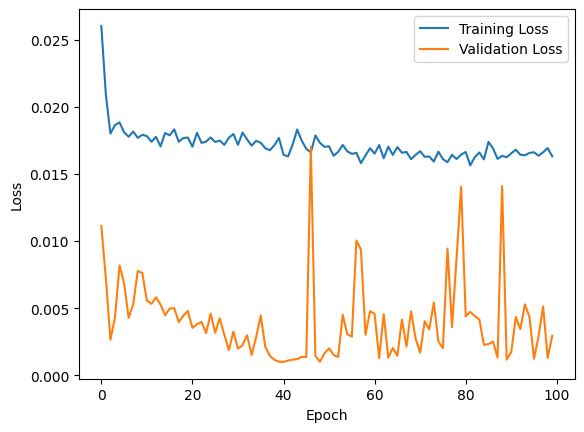

1/1 [==============================] - 1s 680ms/step


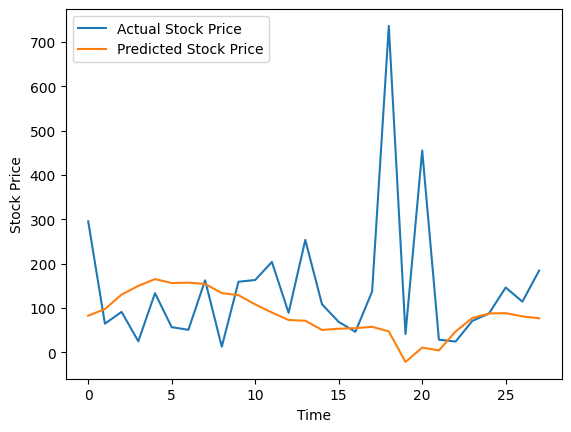

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# Step 1: Data Preprocessing
# Load and preprocess your IPO data
ipo_data = pd.read_csv('IPO.csv')
# Perform any necessary data cleaning and feature engineering
# For example, convert date columns to datetime, scale the data, etc.

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(ipo_data['Listing_Close'].values.reshape(-1, 1))

# Split data into training and test sets
train_data = scaled_data[:int(0.8*len(scaled_data))]
test_data = scaled_data[int(0.8*len(scaled_data)):]

# Function to create sequences for GRU model
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 30

# Create sequences for training and test sets
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Step 2: Build and Train GRU Model
model = Sequential([
    GRU(units=64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    GRU(units=64),
    Dropout(0.2),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Step 3: Evaluate Model
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 4: Make Predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Step 5: Visualization
plt.plot(scaler.inverse_transform(test_data[seq_length:]), label='Actual Stock Price')
plt.plot(predicted_stock_price, label='Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
pip install reportlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.0 MB/s eta 0:00:00


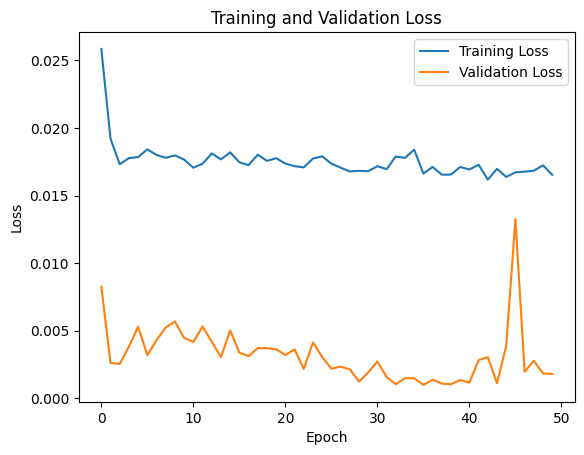

1/1 [==============================] - 1s 712ms/step


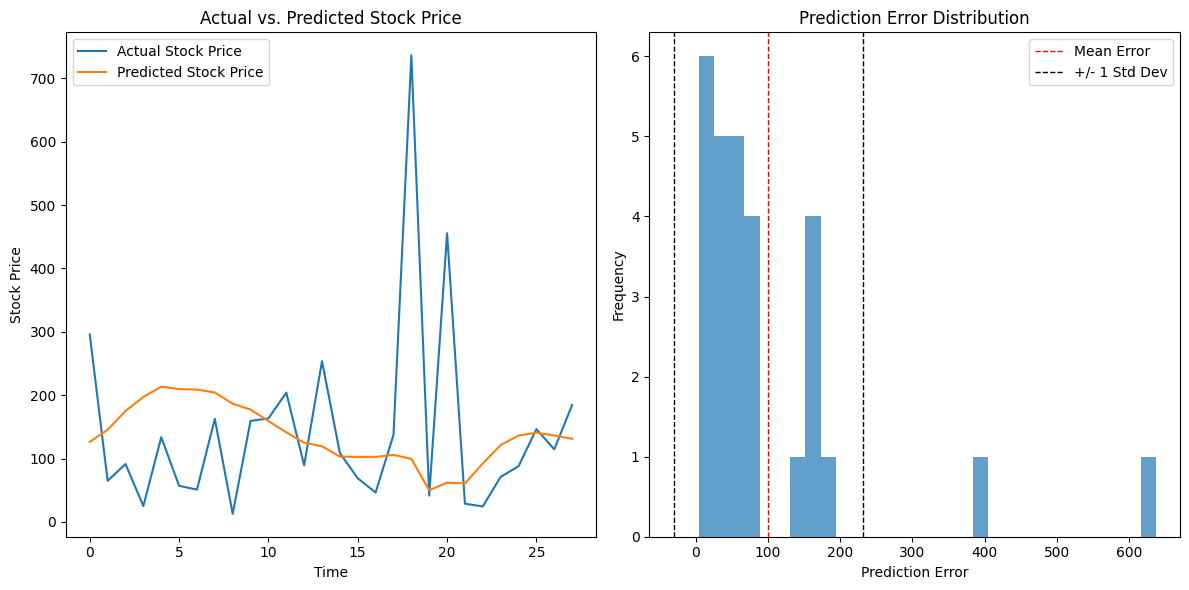

Mean Squared Error (MSE): 27193.685443564667
Mean Absolute Error (MAE): 100.39000202723913
Root Mean Squared Error (RMSE): 164.90508010235666


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
# from reportlab.lib.pagesizes import letter
# from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
# from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
# from reportlab.lib import colors

# Load and preprocess your IPO data
ipo_data = pd.read_csv('IPO.csv')
# Perform any necessary data cleaning and feature engineering

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(ipo_data['Listing_Close'].values.reshape(-1, 1))

# Split data into training and test sets
train_data = scaled_data[:int(0.8*len(scaled_data))]
test_data = scaled_data[int(0.8*len(scaled_data)):]

# Function to create sequences for GRU model
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 30

# Create sequences for training and test sets
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Build GRU Model
model = Sequential([
    GRU(units=64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    GRU(units=64),
    Dropout(0.2),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

# Evaluate Model
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Make Predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Visualization
plt.figure(figsize=(12, 6))

# Actual vs. Predicted Stock Price
plt.subplot(1, 2, 1)
plt.plot(scaler.inverse_transform(test_data[seq_length:]), label='Actual Stock Price')
plt.plot(predicted_stock_price, label='Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Price')
plt.legend()

# Error Analysis
error = np.abs(predicted_stock_price - scaler.inverse_transform(test_data[seq_length:]))
mean_error = np.mean(error)
std_error = np.std(error)
plt.subplot(1, 2, 2)
plt.hist(error, bins=30, alpha=0.7)
plt.axvline(mean_error, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_error + std_error, color='black', linestyle='dashed', linewidth=1)
plt.axvline(mean_error - std_error, color='black', linestyle='dashed', linewidth=1)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Prediction Error Distribution')
plt.legend(['Mean Error', '+/- 1 Std Dev'])
plt.tight_layout()
plt.show()

# Calculate Metrics
mse = np.mean((predicted_stock_price - scaler.inverse_transform(test_data[seq_length:]))**2)
mae = np.mean(np.abs(predicted_stock_price - scaler.inverse_transform(test_data[seq_length:])))
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')













# # Function to generate the PDF report
# def generate_report(filename, evaluation_metrics, ipo_data):
#     doc = SimpleDocTemplate(filename, pagesize=letter)
#     styles = getSampleStyleSheet()

#     # Title
#     title = Paragraph("Financial Analysis Report", styles['Title'])

#     # Evaluation Metrics
#     metrics_title = Paragraph("<br/><b>Evaluation Metrics:</b>", styles['Heading2'])
#     metrics_data = "<br/>Mean Squared Error (MSE): {:.4f}<br/>R-squared (R2): {:.4f}<br/>".format(
#         evaluation_metrics['mse'], evaluation_metrics['r2'])
#     metrics = Paragraph(metrics_data, styles['Normal'])

#     # Actual vs. Predicted Closing Prices
#     closing_prices_title = Paragraph("<br/><b>Actual vs. Predicted Closing Prices:</b>", styles['Heading2'])
#     closing_prices_image = Image("closing_prices_plot.png", width=500, height=300)

#     # Training and Validation Loss
#     loss_title = Paragraph("<br/><b>Training and Validation Loss:</b>", styles['Heading2'])
#     loss_image = Image("loss_plot.png", width=500, height=300)

#     # Financial Ratios
#     ratios_title = Paragraph("<br/><b>Financial Ratios Over Time:</b>", styles['Heading2'])
#     ratios_image = Image("ratios_plot.png", width=500, height=300)

#     # Build the document structure
#     content = [title,
#                Spacer(1, 12),
#                metrics_title, metrics,
#                Spacer(1, 12),
#                closing_prices_title, closing_prices_image,
#                Spacer(1, 12),
#                loss_title, loss_image,
#                Spacer(1, 12),
#                ratios_title, ratios_image]

#     doc.build(content)

# # Generate the report
# evaluation_metrics = {'mse': mse, 'r2': r2}
# report_filename = "financial_analysis_report.pdf"
# generate_report(report_filename, evaluation_metrics, ipo_data)


In [ ]:
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib import colors

# Function to generate the PDF report
def generate_report(filename, evaluation_metrics, ipo_data):
    doc = SimpleDocTemplate(filename, pagesize=letter)
    styles = getSampleStyleSheet()

    # Title
    title = Paragraph("Financial Analysis Report", styles['Title'])

    # Evaluation Metrics
    metrics_title = Paragraph("<br/><b>Evaluation Metrics:</b>", styles['Heading2'])
    metrics_data = "<br/>Mean Squared Error (MSE): {:.4f}<br/>R-squared (R2): {:.4f}<br/>".format(
        evaluation_metrics['mse'], evaluation_metrics['r2'])
    metrics = Paragraph(metrics_data, styles['Normal'])

    # Actual vs. Predicted Closing Prices
    closing_prices_title = Paragraph("<br/><b>Actual vs. Predicted Closing Prices:</b>", styles['Heading2'])
    closing_prices_image = Image("closing_prices_plot.png", width=500, height=300)

    # Training and Validation Loss
    loss_title = Paragraph("<br/><b>Training and Validation Loss:</b>", styles['Heading2'])
    loss_image = Image("loss_plot.png", width=500, height=300)

    # Financial Ratios
    ratios_title = Paragraph("<br/><b>Financial Ratios Over Time:</b>", styles['Heading2'])
    ratios_image = Image("ratios_plot.png", width=500, height=300)

    # Build the document structure
    content = [title,
               Spacer(1, 12),
               metrics_title, metrics,
               Spacer(1, 12),
               closing_prices_title, closing_prices_image,
               Spacer(1, 12),
               loss_title, loss_image,
               Spacer(1, 12),
               ratios_title, ratios_image]

    doc.build(content)

# Generate the report
evaluation_metrics = {'mse': mse, 'r2': r2}
report_filename = "financial_analysis_report.pdf"
generate_report(report_filename, evaluation_metrics, ipo_data)


In [ ]:
def calculate_bhar(actual_return, benchmark_return):
    """Calculate Buy and Hold Abnormal Return (BHAR)"""
    return actual_return - benchmark_return

# Example usage:
actual_return = 0.10  # Example actual return of the IPO (10%)
benchmark_return = 0.08  # Example return of the benchmark index (8%)

bhar = calculate_bhar(actual_return, benchmark_return)
print("Buy and Hold Abnormal Return (BHAR): {:.2f}%".format(bhar * 100))

Epoch 1/50
6/6 [==============================] - 6s 214ms/step - loss: 0.0242 - val_loss: 0.0071
Epoch 2/50
6/6 [==============================] - 0s 37ms/step - loss: 0.0190 - val_loss: 0.0019
Epoch 3/50
6/6 [==============================] - 0s 40ms/step - loss: 0.0189 - val_loss: 0.0016
Epoch 4/50
6/6 [==============================] - 0s 36ms/step - loss: 0.0172 - val_loss: 0.0052
Epoch 5/50
6/6 [==============================] - 0s 36ms/step - loss: 0.0189 - val_loss: 0.0040
Epoch 6/50
6/6 [==============================] - 0s 37ms/step - loss: 0.0179 - val_loss: 0.0016
Epoch 7/50
6/6 [==============================] - 0s 37ms/step - loss: 0.0181 - val_loss: 0.0026
Epoch 8/50
6/6 [==============================] - 0s 38ms/step - loss: 0.0169 - val_loss: 0.0041
Epoch 9/50
6/6 [==============================] - 0s 39ms/step - loss: 0.0170 - val_loss: 0.0044
Epoch 10/50
6/6 [==============================] - 0s 37ms/step - loss: 0.0173 - val_loss: 0.0028
Epoch 11/50
6/6 [===========

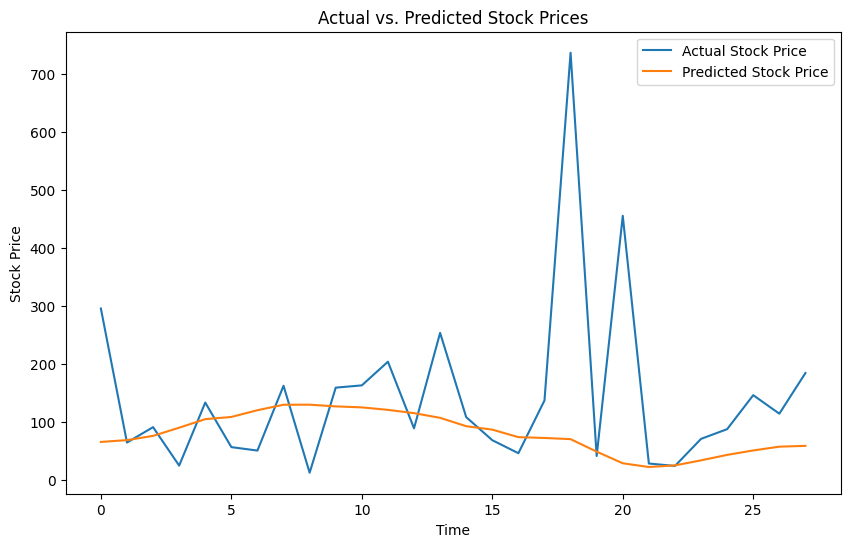

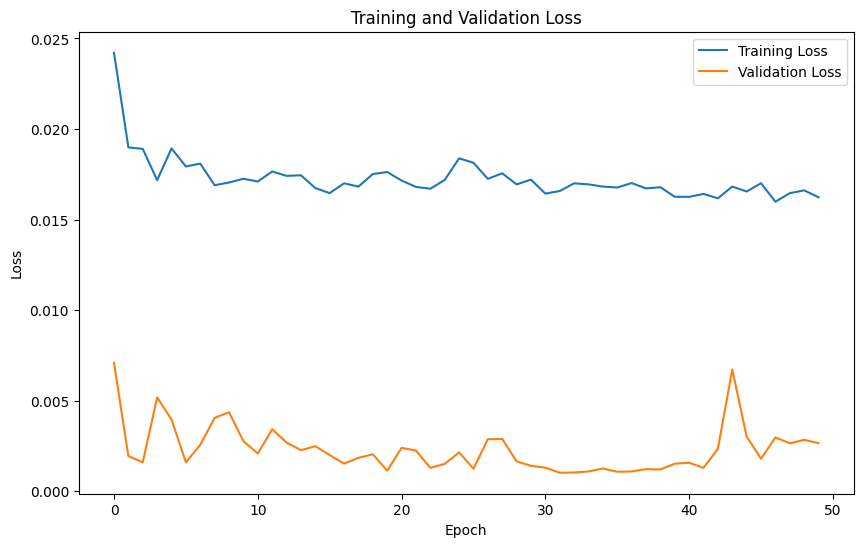

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load IPO data
ipo_data = pd.read_csv('IPO.csv')

# Data preprocessing
# Perform any necessary data cleaning and feature engineering

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(ipo_data['Listing_Close'].values.reshape(-1, 1))

# Split data into training and test sets
train_data = scaled_data[:int(0.8*len(scaled_data))]
test_data = scaled_data[int(0.8*len(scaled_data)):]

# Define sequence length
seq_length = 30

# Function to create sequences for LSTM model
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create sequences for training and test sets
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Build and train LSTM model
model = Sequential([
    LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(units=64),
    Dropout(0.2),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate model
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
test_data_orig = scaler.inverse_transform(test_data[seq_length:])

# Calculate evaluation metrics
mse = mean_squared_error(test_data_orig, predicted_stock_price)
r2 = r2_score(test_data_orig, predicted_stock_price)

# Visualize actual vs. predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(test_data_orig, label='Actual Stock Price')
plt.plot(predicted_stock_price, label='Predicted Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
